In [1]:
from IPython.display import Image

# Vorlesung Quantitative Methoden der BWL
## Eine kurze Vorstellung von Python für Datenanalysen
### Installation
Es gibt eine Vielzahl an Möglichkeiten zur Installation und Nutzung von Python. Hier nutzen wir die Python Distribution Anaconda. Anaconda ist eine Sammlung von nützlichen Bibliotheken unter einem Dach. Das erleichtert uns die Installation erheblich. [Anaconda Download](https://www.continuum.io/downloads)

**Dieses Dokument findet ihr hier: https://github.com/rsdk/wib_qmdbwl**

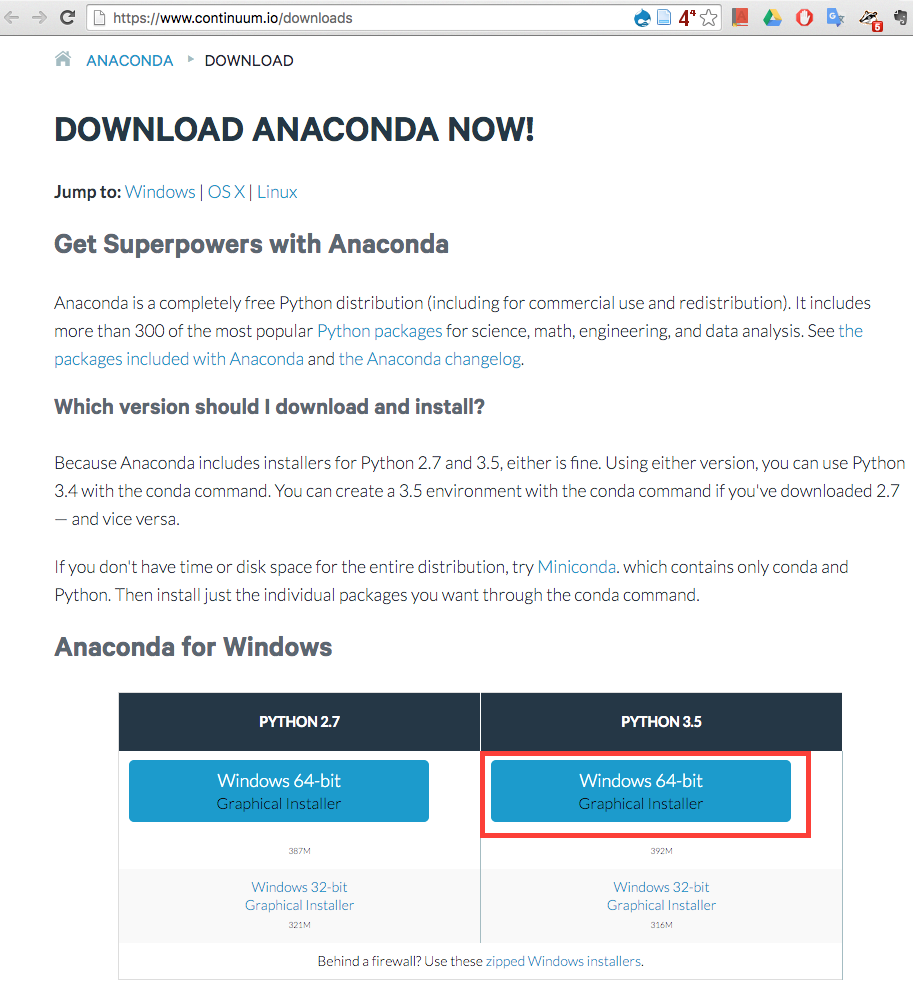

In [2]:
Image(filename='pics/anaconda_install.png') 

### Starten des Programms
1. Starten des Anaconda Launchers
2. Starten des ipython-notebooks

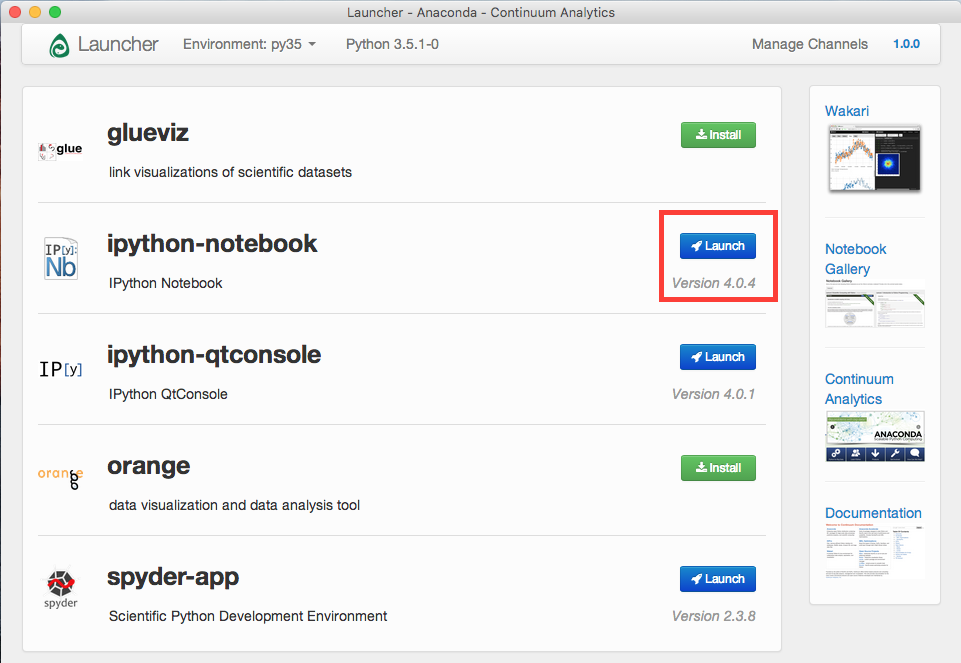

In [3]:
Image(filename='pics/anaconda_launcher.png') 

Dadurch wird ein lokaler Webserver auf Port 8888 gestartet und in einem neuen Browserfenster darauf zugegriffen. Über den Meüpunkt "New" erstellt man ein neues Python Notebook.

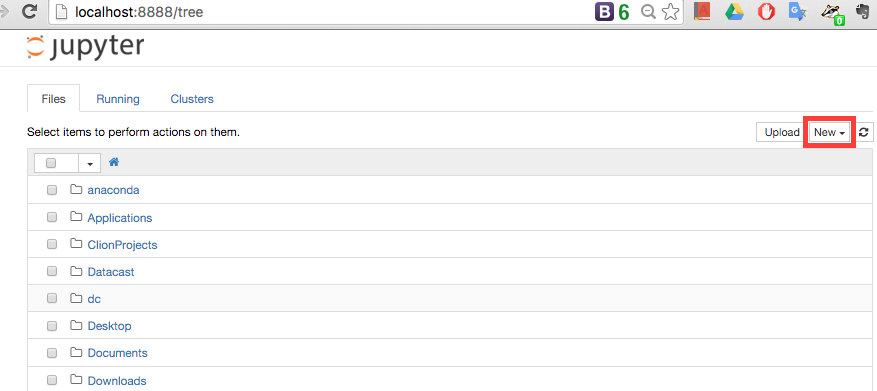

In [4]:
Image(filename='pics/jupyter_browser.png')

Dieses Dokument hier ist genau so ein Python Notebook.

# Datenanalyse & Statistik mit Python
Die Open-Source Bibliothek "Pandas" stellt einfach zu benutzende und schnelle Datenstrukturen zur Datenanalyse bereit. z.B. "Dataframes" ähnlich wie in der Statistik-Programmiersprache R.
- [Python Dokumentation](https://docs.python.org/3/)
- [Pandas Dokumentation](http://pandas.pydata.org/pandas-docs/stable/)
- [Video: Einführung in Pandas in 10 Minuten](https://vimeo.com/59324550)
- [Buch: Datenanalyse mit Python -  Auswertung von Daten mit Pandas, NumPy und IPython](http://www.oreilly.de/catalog/datenanalysemitpythonger/)

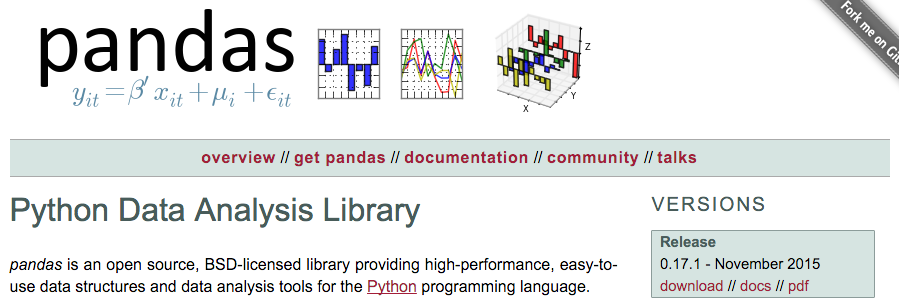

In [5]:
Image(filename='pics/pandas.png')

In [6]:
# Laden von Bibliotheken
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
# Plots direkt im Notebook anzeigen
%matplotlib inline

## Binominalverteilung
https://docs.scipy.org/doc/numpy/reference/routines.random.html

In [7]:
number_of_trials = 1 # >=0
probability = 0.5 # >= 0 and <= 1
size = 10000 # number of draws

binom_ = np.random.binomial(n=number_of_trials, p=probability, size=size)
np.random.binomial(n=number_of_trials, p=probability, size=10)

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0])

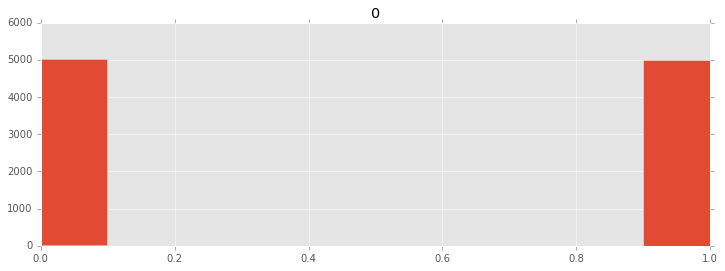

In [8]:
# Histogramm
pd.DataFrame(binom_).hist(figsize=(12,4), bins=10);

## Normalverteilung

In [9]:
mittelwert = 0
sigma = 1 # standardabweichung
size = 10000 # number of draws
norm = np.random.normal(loc=mittelwert, scale=sigma, size=size)
np.random.normal(loc=mittelwert, scale=sigma, size=10)

array([ 1.8408881 , -0.10728923,  0.38405923,  1.32785338, -1.05848751,
       -0.53036514,  0.77222889,  0.59837757,  0.01059522, -0.38879655])

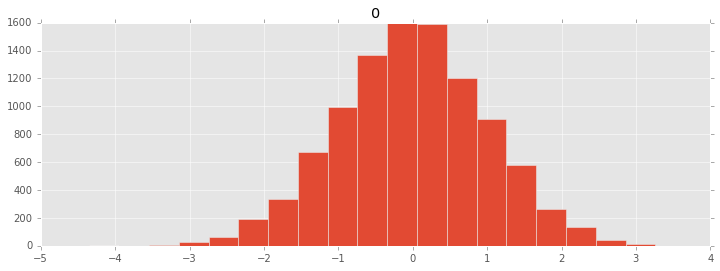

In [10]:
pd.DataFrame(norm).hist(figsize=(12,4), bins=20);

### z-Tabelle
Standardnormalverteilung (Mittelwert = 0, sigma = 1)
für den Wert z=3.00
aus der z-Tabelle -> Fz == 0,99865
- [Tabelle Normalverteilung](https://de.wikipedia.org/wiki/Tabelle_Standardnormalverteilung#Arbeiten_mit_der_Tabelle)
- [SciPy](https://www.scipy.org/)
- [SciPy Statistik](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html)
- [Probability to z-score and vice versa in python](https://stackoverflow.com/questions/20864847/probability-to-z-score-and-vice-versa-in-python)

In [11]:
import scipy.stats as st
import matplotlib.mlab as mlab

In [12]:
mittelwert = 0
sigma = 1 # standardabweichung

Survival: 0.024997895  Die Wahrscheinlichkeit, das ein "gezogener" Wert im rechten Bereich liegt.
pd: 0.058440944
cd: 0.975002105  Die Wahrscheinlichkeit, das ein "gezogener" Wert im linken Bereich liegt.
cd - s: 0.950004210 Die Wahrscheinlichkeit, dass ein "gezogener" Wert im mittleren Bereich liegt, wenn der z Wert 1.96 symmetrisch gilt.


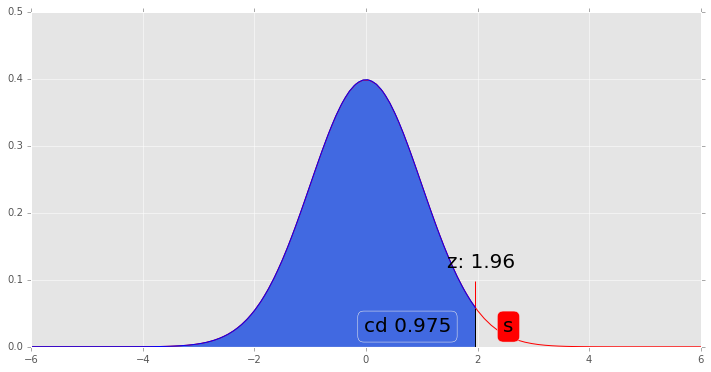

In [13]:
z = 1.96  # z >= 0


s = st.norm.sf(z)
print('Survival: {:0.9f}  Die Wahrscheinlichkeit, das ein "gezogener" Wert im rechten Bereich liegt.'.format(s))
p = st.norm.cdf(z) # cummulative distribution
p_d = st.norm.pdf(z) # probalbility density
print('pd: {:0.9f}'.format(p_d))
print('cd: {:0.9f}  Die Wahrscheinlichkeit, das ein "gezogener" Wert im linken Bereich liegt.'.format(p))
print('cd - s: {:0.9f} Die Wahrscheinlichkeit, dass ein "gezogener" Wert im mittleren Bereich liegt, wenn der z Wert {} symmetrisch gilt.'.format(p-s, z))

x = np.linspace(-6,6,100)
x2 = np.linspace(-6,z,100)

fig = plt.figure(1, figsize=(12, 6))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-6, 6), ylim=(0, .5))

plt.plot(x,mlab.normpdf(x,mittelwert,sigma), color='r')
plt.plot(x2,mlab.normpdf(x2,mittelwert,sigma), color='blue')
plt.vlines(x=z, ymin=0, ymax=p_d)
plt.vlines(x=z, ymin=p_d, ymax=p_d+0.04, color='r')
ax.annotate('z: {:1.2f}'.format(z), xy=(z-0.5, p_d+0.06), size=20,color='black')
plt.fill_between(x=x2, y1=mlab.normpdf(x2,mittelwert,sigma), y2=0, color='royalblue')
ax.annotate('cd {:0.3f}'.format(p), xy=(z-2, 0.022), size=20,color='black', bbox=dict(boxstyle="round", fc='royalblue'))
ax.annotate('s', xy=(z+0.5, 0.022), size=20,color='black', bbox=dict(boxstyle="round", fc='red'));

p: 0.950000000
z1: -1.96
z2: 1.96


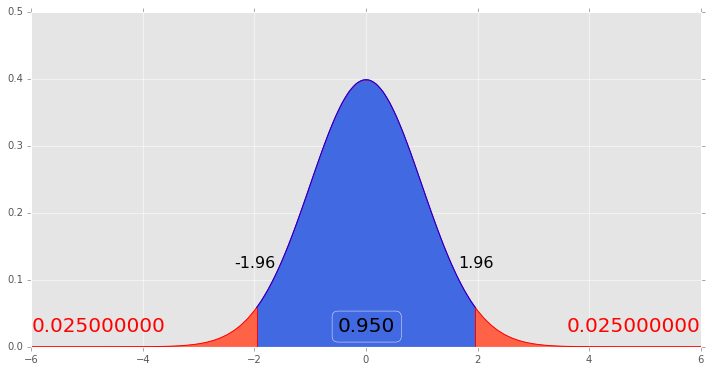

In [14]:
pp = .95



p1 = (1 - pp) / 2
p2 = 1 - p1

z1 = st.norm.ppf(p1)
z2 = st.norm.ppf(p2)  

p = st.norm.pdf(z2) # symetrisch
print('p: {:0.9f}'.format(pp))
print('z1: {:1.2f}'.format(z1))
print('z2: {:1.2f}'.format(z2))

x = np.linspace(-6,6,100)
x2 = np.linspace(z1,z2,100)
x3 = np.linspace(-6,z1,100)
x4 = np.linspace(z2,+6,100)

fig = plt.figure(1, figsize=(12, 6))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-6, 6), ylim=(0, .5))

plt.plot(x,mlab.normpdf(x,mittelwert,sigma), color='r')
plt.plot(x2,mlab.normpdf(x2,mittelwert,sigma), color='blue')

plt.vlines(x=z1, ymin=0, ymax=p, color='r')
plt.vlines(x=z2, ymin=0, ymax=p, color='r')

ax.annotate('{:1.2f}'.format(z1), xy=(z1-0.4, p+0.06), size=16,color='black')
ax.annotate('{:1.2f}'.format(z2), xy=(z2-0.3, p+0.06), size=16,color='black')

plt.fill_between(x=x2, y1=mlab.normpdf(x2,mittelwert,sigma), y2=0, color='royalblue')
plt.fill_between(x=x3, y1=mlab.normpdf(x3,mittelwert,sigma), y2=0, color='tomato')
plt.fill_between(x=x4, y1=mlab.normpdf(x4,mittelwert,sigma), y2=0, color='tomato')
ax.annotate('{:0.3f}'.format(pp), xy=(-.5, 0.022), size=20,color='black', bbox=dict(boxstyle="round", fc='royalblue'))
ax.annotate('{:0.9f}'.format(p1), xy=(-6, 0.022), size=20,color='r');
ax.annotate('{:0.9f}'.format(p1), xy=(+6-2.4, 0.022), size=20,color='r');

## Poissonverteilung

In [15]:
expectation_of_interval = 5
size = 10000 # number of draws
poi = np.random.poisson(lam=expectation_of_interval, size=size)
np.random.poisson(lam=expectation_of_interval, size=10)

array([8, 6, 2, 3, 3, 7, 8, 3, 6, 5])

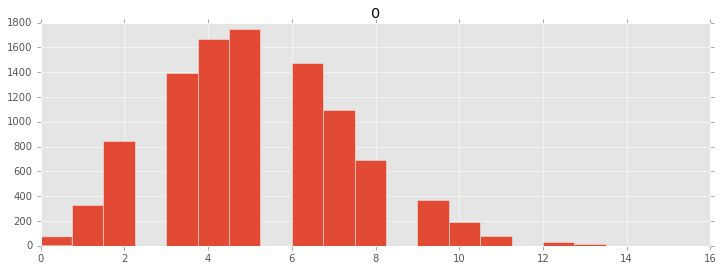

In [16]:
pd.DataFrame(poi).hist(figsize=(12,4), bins=20);

## Zufallswerte
float zwischen 0 und 1

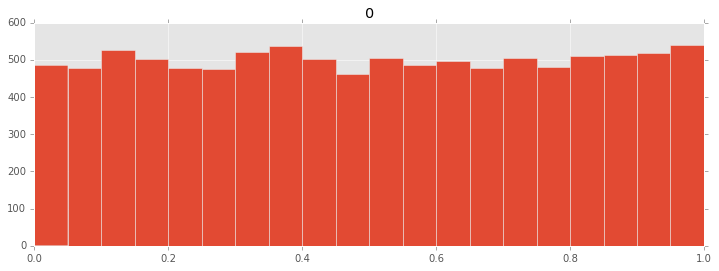

In [17]:
# Zufallswerte als float zwischen 0 und 1
pd.DataFrame(np.random.uniform(size=10000)).hist(figsize=(12,4), bins=20);

# Beispiel Zeitreihen: 

In [18]:
import pandas_datareader.data as web

In [19]:
# Daten von Yahoo Finance laden
aapl = web.get_data_yahoo('AAPL', '2000-01-01')['Adj Close']
msft = web.get_data_yahoo('MSFT', '2000-01-01')['Adj Close']
aapl_rets = aapl.pct_change()
msft_rets = msft.pct_change()

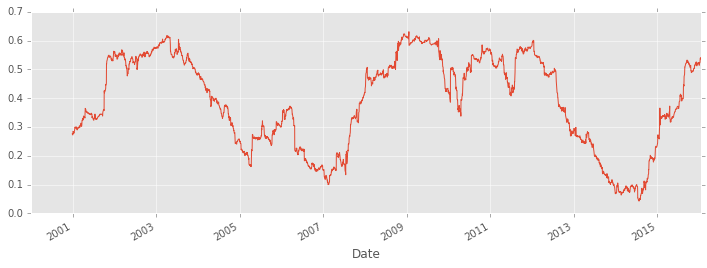

In [20]:
# gleitende Korrelation
pd.rolling_corr(aapl_rets, msft_rets, 250).plot(figsize=(12,4))

In [21]:
# Least-Squares-Regression 
model = pd.ols(y=aapl_rets, x={'MSFT': msft_rets}, window=250)
model.beta.head()

,MSFT,intercept
Date,,
2000-12-28,0.429022,-0.002113
2000-12-29,0.421103,-0.001796
2001-01-02,0.420596,-0.001839
2001-01-03,0.433292,-0.001289
2001-01-04,0.432772,-0.001307


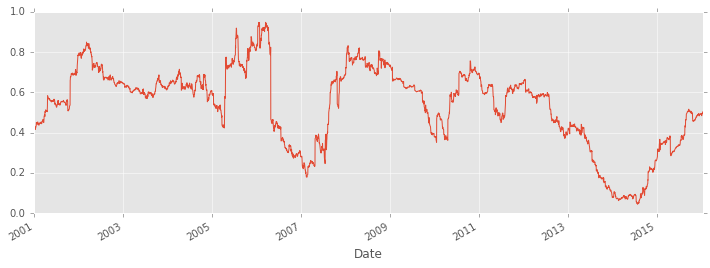

In [22]:
model.beta['MSFT'].plot(figsize=(12,4))

# Beispiel: Kontrollfrage aus dem Skript

## Kontrollfrage 1 von stat 4

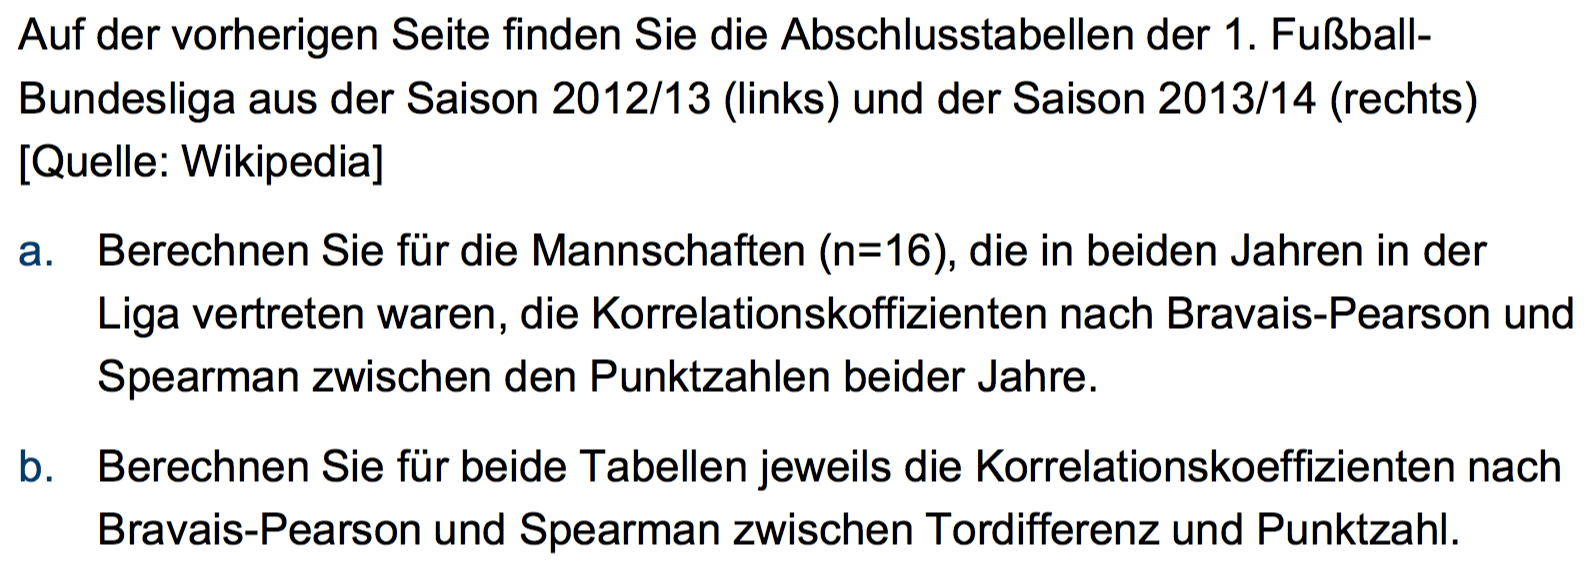

In [23]:
Image(filename='pics/Stat4_Kf1.png') 

## Daten holen
Wir wollen Bundesligaergebnisse auswerten. Wikipedia hat die Daten als Tabellen im HTML. Pandas kann HTML-Tabellen bequem einlesen.

In [24]:
bl_1314_tables = pd.read_html('http://de.wikipedia.org/wiki/Fu%C3%9Fball-Bundesliga_2013/14', header=0)
bl_1213_tables = pd.read_html('http://de.wikipedia.org/wiki/Fu%C3%9Fball-Bundesliga_2012/13', header=0)

Pandas gibt eine Liste mit allen Tabellen aus dem Webseite zurück. Uns interessiert die Tabelle auf index 3.

In [25]:
bl_1314 = bl_1314_tables[2]
bl_1314.head()

,Pl.,Verein,Sp.,S,U,N,Tore,Diff.,Punkte
0,1,"FC Bayern München (M, P)",34,29,3,2,094:230,+71,90
1,2,Borussia Dortmund,34,22,5,7,080:380,+42,71
2,3,FC Schalke 04,34,19,7,8,063:430,+20,64
3,4,Bayer 04 Leverkusen,34,19,4,11,060:410,+19,61
4,5,VfL Wolfsburg,34,18,6,10,063:500,+13,60


In [26]:
bl_1213 = bl_1213_tables[2]
bl_1213.head()

,Pl.,Verein,Sp.,S,U,N,Tore,Diff.,Punkte
0,1,FC Bayern München,34,29,4,1,098:180,+80,91
1,2,"Borussia Dortmund (M, P)",34,19,9,6,081:420,+39,66
2,3,Bayer 04 Leverkusen,34,19,8,7,065:390,+26,65
3,4,FC Schalke 04,34,16,7,11,058:500,+8,55
4,5,SC Freiburg,34,14,9,11,045:400,+5,51


## Daten vorbereiten

In [27]:
def prep_data(df):
    # Die String Daten aus der Spalte "Tore" können nicht in dieser
    # Form verwendet werden. Die Daten müssen auf zwei Spalten 
    # verteilt und in Zahlen umgewandelt werden
    df['Goals shot'] = df['Tore'].apply(lambda x: int(x.split(':')[0]))
    df['Goals received'] = df['Tore'].apply(lambda x: int(x.split(':')[1])/10)
    # Die zusätzlichen Angaben nach dem Vereinsnamen werden entfernt
    # um den Vereinsnamen als Join-Kriterium verwenden zu können
    df['Verein'] = df['Verein'].apply(lambda x: x if x.find('(') == -1 else x[:x.find('(')].strip())
    # Löschen von nicht verwendeten Spalten um die Übersichtlichkeit 
    # zu erhöhen
    del df['Tore']
    del df['Diff.']
    del df['Pl.']
    del df['Sp.']
    del df['S']
    del df['U']
    del df['N']
    # neue Spalte berechnen
    df['Diff'] = df['Goals shot'] - df['Goals received']
    del df['Goals shot']
    del df['Goals received']
    return df

In [28]:
prep_data(bl_1314)
prep_data(bl_1213)
bl_1314.head()

,Verein,Punkte,Diff
0,FC Bayern München,90,71
1,Borussia Dortmund,71,42
2,FC Schalke 04,64,20
3,Bayer 04 Leverkusen,61,19
4,VfL Wolfsburg,60,13


## Beide Tabellen zusammenfügen
Als Join-Kriterium wird der Vereinsname verwendet

In [29]:
both = pd.merge(left=bl_1314, right=bl_1213, how='inner', on='Verein', suffixes=('_1314', '_1213'))
both

,Verein,Punkte_1314,Diff_1314,Punkte_1213,Diff_1213
0,FC Bayern München,90,71,91,80
1,Borussia Dortmund,71,42,66,39
2,FC Schalke 04,64,20,55,8
3,Bayer 04 Leverkusen,61,19,65,26
4,VfL Wolfsburg,60,13,43,-5
5,Borussia Mönchengladbach,55,16,47,-4
6,1. FSV Mainz 05,53,-2,42,-2
7,FC Augsburg,52,0,33,-18
8,TSG 1899 Hoffenheim,44,2,31,-25
9,Hannover 96,42,-13,45,-2


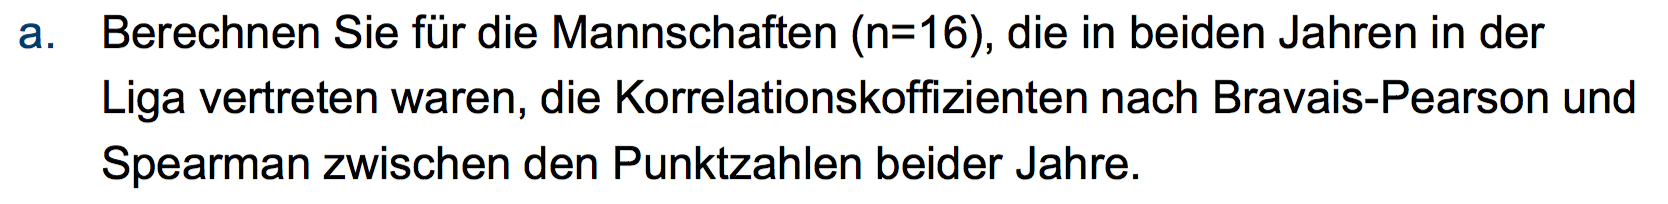

In [30]:
Image(filename='pics/Stat4_Kf1_a.png') 

In [31]:
both[['Punkte_1314', 'Punkte_1213']].corr(method='pearson')

,Punkte_1314,Punkte_1213
Punkte_1314,1.0000,0.6902
Punkte_1213,0.6902,1.0000


In [32]:
both[['Punkte_1314', 'Punkte_1213']].corr(method='spearman')

,Punkte_1314,Punkte_1213
Punkte_1314,1.000000,0.415623
Punkte_1213,0.415623,1.000000


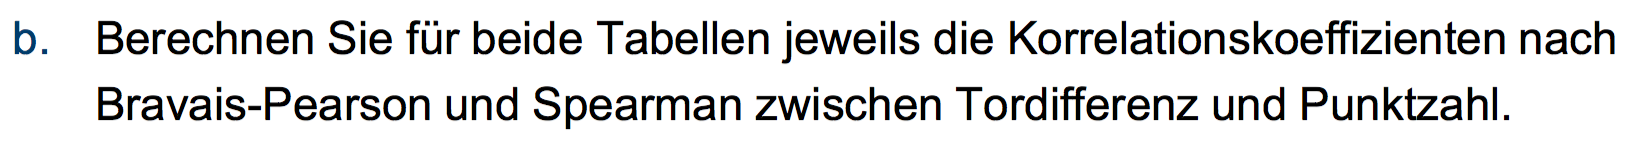

In [33]:
Image(filename='pics/Stat4_Kf1_b.png') 

## Tabelle Bundesliga 12/13

In [34]:
bl_1213.corr(method='pearson')

,Punkte,Diff
Punkte,1.000000,0.968099
Diff,0.968099,1.000000


In [35]:
bl_1213.corr(method='spearman')

,Punkte,Diff
Punkte,1.000000,0.916625
Diff,0.916625,1.000000


## Tabelle Bundesliga 13/14

In [36]:
bl_1314.corr(method='pearson')

,Punkte,Diff
Punkte,1.000000,0.971243
Diff,0.971243,1.000000


In [37]:
bl_1314.corr(method='spearman')

,Punkte,Diff
Punkte,1.00000,0.95814
Diff,0.95814,1.00000


**Dieses Dokument findet ihr hier: https://github.com/rsdk/wib_qmdbwl**